In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the cleaned dataset

df = pd.read_csv('../dataset/cleaned_telco_churn.csv')
print('dataset loaded')

dataset loaded


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
# Droping the customerID column as it's not a predictive feature

df = df.drop('customerID', axis=1)
print("customerID column dropped.")

df.head()

customerID column dropped.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Converting the 'Churn' column to 1s and 0s so the model can understand

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Target variable 'Churn' converted to 1s and 0s.")

df.head()

Target variable 'Churn' converted to 1s and 0s.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Correlation Matrix


In [9]:

numerical_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_df.corr()

print("Correlation with Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))

Correlation with Churn:
Churn             1.000000
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


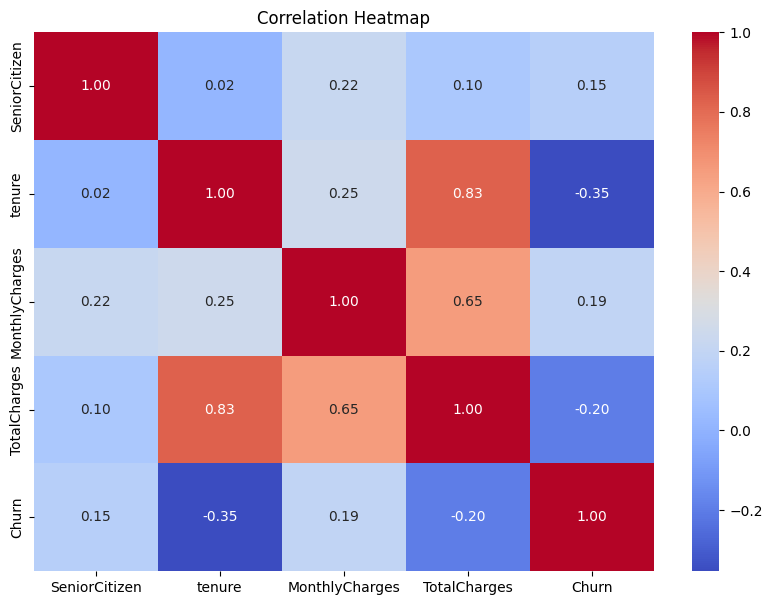

In [10]:
# heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, 
            annot=True,     
            fmt='.2f',     
            cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Separate features (X) and target (y) columns

X = df.drop('Churn', axis=1)
y = df['Churn']

print("Data separated into X and y.")
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Data separated into X and y.
Shape of X (features): (7032, 19)
Shape of y (target): (7032,)


In [14]:
# Splitting the dataset for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

print("Data successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data successfully split into training and testing sets.
X_train shape: (5625, 19)
X_test shape: (1407, 19)
y_train shape: (5625,)
y_test shape: (1407,)


In [15]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [16]:
# Dataset preprocessing

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Define the numerical transformer (Scaler)
numerical_transformer = StandardScaler()

# 2. Define the categorical transformer (Encoder)
# handle_unknown='ignore' tells the encoder to ignore any new categories it might see in the test data, which prevents errors.
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' 
)

print("Preprocessing pipeline created successfully.")
print(preprocessor)

Preprocessing pipeline created successfully.
ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])


In [19]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Data processing complete.")
print(f"Original X_train shape: {X_train.shape}")
print(f"Processed X_train shape: {X_train_processed.shape}")

Data processing complete.
Original X_train shape: (5625, 19)
Processed X_train shape: (5625, 45)


In [20]:
print(X_train_processed[:5])

[[-0.4473567   0.47131806 -0.35560868  0.04313883  0.          1.
   0.          1.          1.          0.          1.          0.
   0.          1.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          1.
   0.          0.          1.          1.          0.          0.
   0.          0.          1.          0.          0.          1.
   0.          0.          1.          1.          0.          1.
   0.          0.          0.        ]
 [-0.4473567  -0.34332184  0.49622924 -0.12831683  0.          1.
   1.          0.          1.          0.          0.          1.
   1.          0.          0.          0.          1.          0.
   1.          0.          0.          1.          0.          0.
   1.          0.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          1.
   1.          0.          0.          0.          1.          0.
   1.          0.          0.        

# Logistic Regression Model

In [21]:
# Using LogisticRegression

from sklearn.linear_model import LogisticRegression

#tells the model to pay more attention to the minority class
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)

model_lr.fit(X_train_processed, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [22]:
#predictions on the test set

y_pred_lr = model_lr.predict(X_test_processed)
print("Predictions made on the test set.")

Predictions made on the test set.


In [29]:
# Evaluation metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Accuracy

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"--- Logistic Regression Accuracy ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print("\n") 

--- Logistic Regression Accuracy ---
Accuracy: 0.7569




--- Logistic Regression Confusion Matrix ---


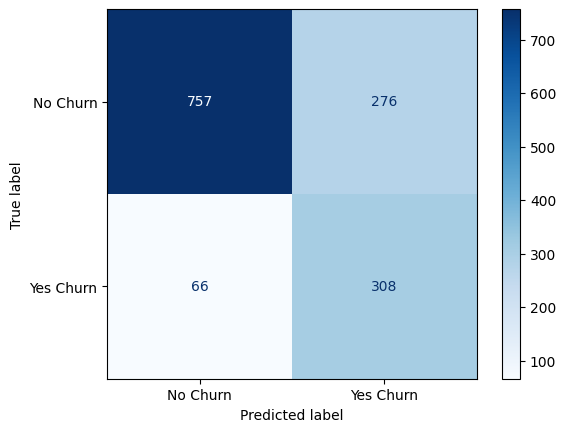

In [30]:
#Confusion matrix

print(f"--- Logistic Regression Confusion Matrix ---")
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Churn', 'Yes Churn'])
disp.plot(cmap='Blues')
plt.show()
print("\n")

In [28]:
# Classification Report

print(f"--- Logistic Regression Classification Report ---")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Yes Churn']))

--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

    No Churn       0.92      0.73      0.82      1033
   Yes Churn       0.53      0.82      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.78      0.73      1407
weighted avg       0.82      0.76      0.77      1407



# Random Forest Classifier Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

print("--- Training Random Forest Model ---")

# Class_weight='balanced' is being used because of imbalanced data
model_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Training the model
model_rf.fit(X_train_processed, y_train)
print("Random Forest model trained successfully.")

# Makeing predictions
y_pred_rf = model_rf.predict(X_test_processed)

--- Training Random Forest Model ---
Random Forest model trained successfully.


In [33]:
# Accuracy 

print("\n--- Random Forest Accuracy ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("\n")


--- Random Forest Accuracy ---
Accuracy: 0.8003




--- Random Forest Confusion Matrix ---


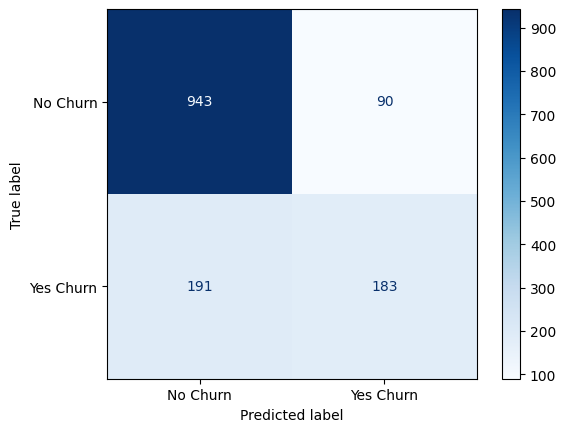

In [34]:
# Confusion Matrix

print(f"--- Random Forest Confusion Matrix ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Churn', 'Yes Churn'])
disp.plot(cmap='Blues')
plt.show()
print("\n")

In [35]:
# Classification Report

print(f"--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Yes Churn']))

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1033
   Yes Churn       0.67      0.49      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



C:\Users\prakh\AppData\Local\Temp\ipykernel_11244\3318372764.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='mako')


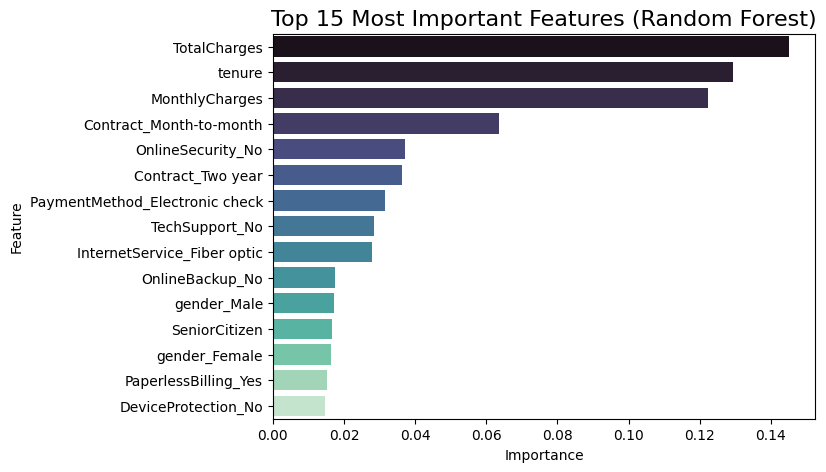

Top 10 Features:
                           Feature  Importance
3                     TotalCharges    0.145211
1                           tenure    0.129379
2                   MonthlyCharges    0.122213
36         Contract_Month-to-month    0.063561
18               OnlineSecurity_No    0.037072
38               Contract_Two year    0.036218
43  PaymentMethod_Electronic check    0.031519
27                  TechSupport_No    0.028493
16     InternetService_Fiber optic    0.027959
21                 OnlineBackup_No    0.017385


In [38]:
# Feature importances from our trained Random Forest

importances = model_rf.feature_importances_

feature_names = numerical_cols + \
                preprocessor.named_transformers_['cat']\
                .get_feature_names_out(categorical_cols).tolist()

# Creating a DataFrame to hold the feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sorting the DataFrame to show the most important features at the top
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='mako')
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Printing the top 10 as a list
print("Top 10 Features:")
print(importance_df.head(10))

In [42]:
# Hyperparameter Tuning

# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],       
    'max_depth': [10, 20],             
    'min_samples_leaf': [2, 4]}         

rf_for_tuning = RandomForestClassifier(class_weight='balanced', random_state=50)

# scoring='recall':find the model with the BEST recall for 'Yes Churn'.
# cv=5: Use 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_for_tuning, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='recall', 
                           n_jobs=-1)

In [44]:
grid_search.fit(X_train_processed, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)

print("\nBest cross-validation recall score:")
print(f"{grid_search.best_score_:.4f}")


Best parameters found:
{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}

Best cross-validation recall score:
0.7445


In [45]:
print("--- Evaluating the Tuned Model on the Test Set ---")

y_pred_best_rf = grid_search.predict(X_test_processed)

# New classification report
print(classification_report(y_test, y_pred_best_rf, target_names=['No Churn', 'Yes Churn']))

--- Evaluating the Tuned Model on the Test Set ---
              precision    recall  f1-score   support

    No Churn       0.90      0.79      0.84      1033
   Yes Churn       0.57      0.76      0.65       374

    accuracy                           0.78      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.78      0.79      1407



--- Getting Feature Importances from TUNED Model ---


C:\Users\prakh\AppData\Local\Temp\ipykernel_11244\2944964488.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_tuned.head(15), palette='flare')


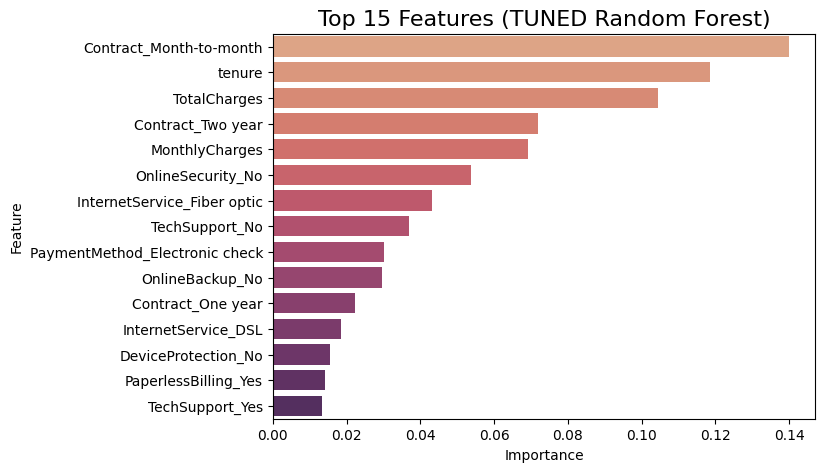

Top 10 Features (TUNED Model):
                           Feature  Importance
36         Contract_Month-to-month    0.140101
1                           tenure    0.118467
3                     TotalCharges    0.104510
38               Contract_Two year    0.072003
2                   MonthlyCharges    0.069260
18               OnlineSecurity_No    0.053879
16     InternetService_Fiber optic    0.043191
27                  TechSupport_No    0.037048
43  PaymentMethod_Electronic check    0.030153
21                 OnlineBackup_No    0.029692


In [47]:
# Feature Importance in RFC

print("--- Getting Feature Importances from TUNED Model ---")

best_model_rf = grid_search.best_estimator_

importances = best_model_rf.feature_importances_

feature_names = numerical_cols + \
                preprocessor.named_transformers_['cat']\
                .get_feature_names_out(categorical_cols).tolist()

importance_df_tuned = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df_tuned = importance_df_tuned.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df_tuned.head(15), palette='flare')
plt.title('Top 15 Features (TUNED Random Forest)', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("Top 10 Features (TUNED Model):")
print(importance_df_tuned.head(10))

In [48]:
# Saving the Model

import joblib
import os

print("--- Saving model and preprocessor ---")

model_dir = "../models"
os.makedirs(model_dir, exist_ok=True) 

# Save the preprocessor
preprocessor_path = os.path.join(model_dir, "preprocessor.joblib")
joblib.dump(preprocessor, preprocessor_path)
print(f"Preprocessor saved to {preprocessor_path}")

# Save the best (tuned) model
model_path = os.path.join(model_dir, "best_rf_model.joblib")
joblib.dump(grid_search, model_path)
print(f"Tuned model saved to {model_path}")

--- Saving model and preprocessor ---
Preprocessor saved to ../models\preprocessor.joblib
Tuned model saved to ../models\best_rf_model.joblib
